In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import sklearn
##importing dataframe and parsing dates
df = pd.read_csv("./DATA/bluebook/TrainAndValid.csv",low_memory= False,
                 parse_dates= ["saledate"])

df

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1139246,66000.0,999089,3157,121,3.0,2004,68.0,Low,2006-11-16,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
1,1139248,57000.0,117657,77,121,3.0,1996,4640.0,Low,2004-03-26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1139249,10000.0,434808,7009,121,3.0,2001,2838.0,High,2004-02-26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1139251,38500.0,1026470,332,121,3.0,2001,3486.0,High,2011-05-19,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1139253,11000.0,1057373,17311,121,3.0,2007,722.0,Medium,2009-07-23,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
412693,6333344,10000.0,1919201,21435,149,2.0,2005,NaN,NaN,2012-03-07,...,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
412694,6333345,10500.0,1882122,21436,149,2.0,2005,NaN,NaN,2012-01-28,...,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
412695,6333347,12500.0,1944213,21435,149,2.0,2005,NaN,NaN,2012-01-28,...,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
412696,6333348,10000.0,1794518,21435,149,2.0,2006,NaN,NaN,2012-03-07,...,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN


In [3]:
df.isna().sum()

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    265194
UsageBand                   339028
saledate                         0
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             140727
fiModelSeries               354031
fiModelDescriptor           337882
ProductSize                 216605
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                305611
Enclosure                      334
Forks                       214983
Pad_Type                    331602
Ride_Control                259970
Stick                       331602
Transmission                224691
Turbocharged                331602
Blade_Extension     

When we work with time data series,we want to enrich the time and date component as much as possible.
we can do that by telling pandas which of our columns has dates in it using the parse_dates parameters


In [4]:
df.saledate.dtype
df.saledate[:1000]

0     2006-11-16
1     2004-03-26
2     2004-02-26
3     2011-05-19
4     2009-07-23
         ...    
995   2009-07-16
996   2007-06-14
997   2005-09-22
998   2005-07-28
999   2011-06-16
Name: saledate, Length: 1000, dtype: datetime64[ns]

In [5]:
## make a copy of DataFrame
df_c = df.copy()
df_c["saleyear"] = df_c.saledate.dt.year
df_c["salemonth"] = df_c.saledate.dt.month
df_c["saleday"] = df_c.saledate.dt.day
df_c["saledayofweek"] = df_c.saledate.dt.dayofweek
df_c["saledayofyear"] = df_c.saledate.dt.dayofyear
df_c
df_c.drop("saledate", axis= 1, inplace= True )
df_c.isna().sum()
df_c.info()
df_c.UsageBand.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Data columns (total 57 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   SalesID                   412698 non-null  int64  
 1   SalePrice                 412698 non-null  float64
 2   MachineID                 412698 non-null  int64  
 3   ModelID                   412698 non-null  int64  
 4   datasource                412698 non-null  int64  
 5   auctioneerID              392562 non-null  float64
 6   YearMade                  412698 non-null  int64  
 7   MachineHoursCurrentMeter  147504 non-null  float64
 8   UsageBand                 73670 non-null   object 
 9   fiModelDesc               412698 non-null  object 
 10  fiBaseModel               412698 non-null  object 
 11  fiSecondaryDesc           271971 non-null  object 
 12  fiModelSeries             58667 non-null   object 
 13  fiModelDescriptor         74816 non-null   o

0       Low
1       Low
2      High
3      High
4    Medium
Name: UsageBand, dtype: object

changing string features to category

In [6]:
for labels, content in df_c.items() :
    if pd.api.types.is_object_dtype(content) :
        df_c[labels] = content.astype("category").cat.as_ordered()
     
        
df_c.state.cat.categories
df_c.info()
      

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Data columns (total 57 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   SalesID                   412698 non-null  int64   
 1   SalePrice                 412698 non-null  float64 
 2   MachineID                 412698 non-null  int64   
 3   ModelID                   412698 non-null  int64   
 4   datasource                412698 non-null  int64   
 5   auctioneerID              392562 non-null  float64 
 6   YearMade                  412698 non-null  int64   
 7   MachineHoursCurrentMeter  147504 non-null  float64 
 8   UsageBand                 73670 non-null   category
 9   fiModelDesc               412698 non-null  category
 10  fiBaseModel               412698 non-null  category
 11  fiSecondaryDesc           271971 non-null  category
 12  fiModelSeries             58667 non-null   category
 13  fiModelDescriptor         748

In [7]:
df_c.isna().sum()

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    265194
UsageBand                   339028
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             140727
fiModelSeries               354031
fiModelDescriptor           337882
ProductSize                 216605
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                305611
Enclosure                      334
Forks                       214983
Pad_Type                    331602
Ride_Control                259970
Stick                       331602
Transmission                224691
Turbocharged                331602
Blade_Extension             386715
Blade_Width         

saving the transformed data 

In [8]:
df_c.to_csv("./DATA/bluebook/TransformedTrV.csv", index=False)
df_c = pd.read_csv("./DATA/bluebook/TransformedTrV.csv", low_memory=False)
df_c

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,...,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls,saleyear,salemonth,saleday,saledayofweek,saledayofyear
0,1139246,66000.0,999089,3157,121,3.0,2004,68.0,Low,521D,...,NaN,NaN,NaN,Standard,Conventional,2006,11,16,3,320
1,1139248,57000.0,117657,77,121,3.0,1996,4640.0,Low,950FII,...,NaN,NaN,NaN,Standard,Conventional,2004,3,26,4,86
2,1139249,10000.0,434808,7009,121,3.0,2001,2838.0,High,226,...,NaN,NaN,NaN,NaN,NaN,2004,2,26,3,57
3,1139251,38500.0,1026470,332,121,3.0,2001,3486.0,High,PC120-6E,...,NaN,NaN,NaN,NaN,NaN,2011,5,19,3,139
4,1139253,11000.0,1057373,17311,121,3.0,2007,722.0,Medium,S175,...,NaN,NaN,NaN,NaN,NaN,2009,7,23,3,204
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
412693,6333344,10000.0,1919201,21435,149,2.0,2005,NaN,NaN,30NX,...,NaN,NaN,NaN,NaN,NaN,2012,3,7,2,67
412694,6333345,10500.0,1882122,21436,149,2.0,2005,NaN,NaN,30NX2,...,NaN,NaN,NaN,NaN,NaN,2012,1,28,5,28
412695,6333347,12500.0,1944213,21435,149,2.0,2005,NaN,NaN,30NX,...,NaN,NaN,NaN,NaN,NaN,2012,1,28,5,28
412696,6333348,10000.0,1794518,21435,149,2.0,2006,NaN,NaN,30NX,...,NaN,NaN,NaN,NaN,NaN,2012,3,7,2,67


filling the numeric data types

In [102]:
for label, content in df_c.items() :
    if pd.api.types.is_numeric_dtype(content) :
        if pd.isnull(content).sum() :
            df_c[label] = content.fillna(content.median())
            
for label, content in df_c.items() :
    if pd.api.types.is_numeric_dtype(content) :
        if pd.isnull(content).sum() :
            print(label)
            
            
for label, content in df_c.items() :
    if pd.api.types.is_numeric_dtype(content) :
        print(label)

SalesID
SalePrice
MachineID
ModelID
datasource
auctioneerID
YearMade
MachineHoursCurrentMeter
UsageBand
fiModelDesc
fiBaseModel
fiSecondaryDesc
fiModelSeries
fiModelDescriptor
ProductSize
fiProductClassDesc
state
ProductGroup
ProductGroupDesc
Drive_System
Enclosure
Forks
Pad_Type
Ride_Control
Stick
Transmission
Turbocharged
Blade_Extension
Blade_Width
Enclosure_Type
Engine_Horsepower
Hydraulics
Pushblock
Ripper
Scarifier
Tip_Control
Tire_Size
Coupler
Coupler_System
Grouser_Tracks
Hydraulics_Flow
Track_Type
Undercarriage_Pad_Width
Stick_Length
Thumb
Pattern_Changer
Grouser_Type
Backhoe_Mounting
Blade_Type
Travel_Controls
Differential_Type
Steering_Controls
saleyear
salemonth
saleday
saledayofweek
saledayofyear


FILLING THE  MISSING CATEGORICAL FEATURES 

In [100]:
for label, content in df_c.items() :
    if not pd.api.types.is_numeric_dtype(content) :
      df_c[label] = pd.Categorical(content).codes +1
      
df_c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Data columns (total 57 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   SalesID                   412698 non-null  int64  
 1   SalePrice                 412698 non-null  float64
 2   MachineID                 412698 non-null  int64  
 3   ModelID                   412698 non-null  int64  
 4   datasource                412698 non-null  int64  
 5   auctioneerID              412698 non-null  float64
 6   YearMade                  412698 non-null  int64  
 7   MachineHoursCurrentMeter  412698 non-null  float64
 8   UsageBand                 412698 non-null  int8   
 9   fiModelDesc               412698 non-null  int16  
 10  fiBaseModel               412698 non-null  int16  
 11  fiSecondaryDesc           412698 non-null  int16  
 12  fiModelSeries             412698 non-null  int8   
 13  fiModelDescriptor         412698 non-null  i

SPLITTING INTO X AND Y 

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_jobs=-1, random_state=42, max_samples=1000)


In [12]:
df_val = df_c[df_c.saleyear== 2012]
df_train = df_c[df_c.saleyear!= 2012]

len(df_val), len(df_train)
df_val

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,...,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls,saleyear,salemonth,saleday,saledayofweek,saledayofyear
401125,1222837,31000.0,902859,1376,121,3.0,1000,0.0,0,683,...,0,0,0,0,0,2012,1,5,3,5
401126,1222839,54000.0,1048320,36526,121,3.0,2006,4412.0,3,4641,...,0,0,0,0,0,2012,1,5,3,5
401127,1222841,26500.0,999308,4587,121,3.0,2000,10127.0,3,414,...,0,0,0,0,0,2012,1,5,3,5
401128,1222843,10000.0,1062425,1954,121,3.0,1000,4682.0,2,1653,...,0,0,0,0,0,2012,1,5,3,5
401129,1222845,35000.0,1032841,4701,121,3.0,2002,8150.0,3,989,...,0,0,0,4,2,2012,1,4,2,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
412693,6333344,10000.0,1919201,21435,149,2.0,2005,0.0,0,490,...,0,0,0,0,0,2012,3,7,2,67
412694,6333345,10500.0,1882122,21436,149,2.0,2005,0.0,0,491,...,0,0,0,0,0,2012,1,28,5,28
412695,6333347,12500.0,1944213,21435,149,2.0,2005,0.0,0,490,...,0,0,0,0,0,2012,1,28,5,28
412696,6333348,10000.0,1794518,21435,149,2.0,2006,0.0,0,490,...,0,0,0,0,0,2012,3,7,2,67


In [13]:
X_train, Y_train = df_train.drop("SalePrice", axis=1), df_train["SalePrice"]
X_valid, Y_valid = df_val.drop("SalePrice", axis= 1), df_val["SalePrice"]

X_train.shape,X_valid.shape, Y_train.shape, Y_valid.shape

((401125, 56), (11573, 56), (401125,), (11573,))

EVALUATION FUNCTION 

In [14]:
from  sklearn.metrics import mean_absolute_error, mean_squared_log_error, r2_score

def rmsle(ytest, ypred) :
    return np.sqrt(mean_squared_log_error(ytest, ypred))

#create a function to evaluate model on a few differrent levels
def show_scores(model) :
    train_preds = model.predict(X_train)
    val_preds = model.predict(X_valid)
    scores = {"training MAE":mean_absolute_error(Y_train, train_preds),
              "Valid MAE":mean_absolute_error(Y_valid, val_preds),
              "Training RMSLE":rmsle(Y_train, train_preds),
              "Valid RMSLE":rmsle(Y_valid,val_preds),
              "Training r2":r2_score(Y_train,train_preds),
              "Valid r2": r2_score(Y_valid,val_preds)}
    return  scores

In [15]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_jobs=-1, random_state=42, max_samples=30000)
model.fit(X_train,Y_train)

RandomForestRegressor(max_samples=30000, n_jobs=-1, random_state=42)

In [16]:
show_scores(model)

{'training MAE': 4728.278320049858,
 'Valid MAE': 6546.761810247992,
 'Training RMSLE': 0.2237626697746522,
 'Valid RMSLE': 0.270735840731005,
 'Training r2': 0.8968570206139278,
 'Valid r2': 0.8585210949676456}

HYPERPARAMETER TUNING WITH RANDOMIZEDSEARCHSV 

In [17]:
from sklearn.model_selection import RandomizedSearchCV

# Define hyperparameter grid for RandomizedSearchCV
param_grid = {
    'n_estimators': [80, 90, 100],
    'max_depth': [None, 70, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [ 'sqrt', 'log2']
}

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=model,
                                   param_distributions=param_grid,
                                   n_iter=10,
                                   cv=5,
                                   scoring='neg_mean_absolute_error',
                                   random_state=42)

# Fit the model to the data
random_search.fit(X_train, Y_train)

# Get the best hyperparameters


print("Best Hyperparameters:")
random_search.best_params_

# Evaluate the model on the test set




Best Hyperparameters:


{'n_estimators': 90,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 50}

In [18]:
ideal_model = RandomForestRegressor(n_estimators = 90,
 min_samples_split= 2,
 min_samples_leaf= 1,
 max_features= 'sqrt',
 max_depth= 50)

ideal_model.fit(X_train, Y_train)

RandomForestRegressor(max_depth=50, max_features='sqrt', n_estimators=90)

In [19]:
show_scores(ideal_model)

{'training MAE': 1759.6393613393443,
 'Valid MAE': 6243.261636809765,
 'Training RMSLE': 0.09174000383481494,
 'Valid RMSLE': 0.2582250069208229,
 'Training r2': 0.985215292547022,
 'Valid r2': 0.8728261969985904}

In [20]:
show_scores(random_search)

{'training MAE': 5588.9864390752855,
 'Valid MAE': 7382.556121048034,
 'Training RMSLE': 0.2561987511524623,
 'Valid RMSLE': 0.305864498544482,
 'Training r2': 0.8629715517751502,
 'Valid r2': 0.8311956938678943}

DEFINING A FUNCTION TO TRANSFORM DATA 

In [131]:
def transform(df) :
    df["saleyear"] = df.saledate.dt.year
    df["salemonth"] = df.saledate.dt.month
    df["saleday"] = df.saledate.dt.day
    df["saledayofweek"] = df.saledate.dt.dayofweek
    df["saledayofyear"] = df.saledate.dt.dayofyear
    df.drop("saledate", axis= 1, inplace= True )
    for labels, content in df.items() :
        if pd.api.types.is_object_dtype(content) :
            df[labels] = content.astype("category").cat.as_ordered()
            
    
    
    for label, content in df.items() :
        if pd.api.types.is_numeric_dtype(content) :
            if pd.isnull(content).sum() :
                df[label] = content.fillna(content.median())
            
    for label, content in df.items():
        if not pd.api.types.is_numeric_dtype(content) :
            df[label] = pd.Categorical(content).codes +1
            
       
    return df

In [144]:
g = pd.read_csv("./DATA/bluebook/Transformed_df.csv")
g.info()
g
#dsjvkjxvckxvh 
for labels, content in g.items() :
    if pd.api.types.is_object_dtype(content) :
        print(labels)
     
        

      

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12457 entries, 0 to 12456
Data columns (total 56 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   SalesID                   12457 non-null  int64  
 1   MachineID                 12457 non-null  int64  
 2   ModelID                   12457 non-null  int64  
 3   datasource                12457 non-null  int64  
 4   auctioneerID              12457 non-null  int64  
 5   YearMade                  12457 non-null  int64  
 6   MachineHoursCurrentMeter  2129 non-null   float64
 7   UsageBand                 1834 non-null   object 
 8   fiModelDesc               12457 non-null  object 
 9   fiBaseModel               12457 non-null  object 
 10  fiSecondaryDesc           8482 non-null   object 
 11  fiModelSeries             2006 non-null   object 
 12  fiModelDescriptor         3024 non-null   object 
 13  ProductSize               6048 non-null   object 
 14  fiProd

In [136]:
testdf = pd.read_csv("./DATA/bluebook/Test.csv",  low_memory=False, parse_dates=["saledate"] )
testdf_c = testdf.copy()
testdf_c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12457 entries, 0 to 12456
Data columns (total 52 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   SalesID                   12457 non-null  int64         
 1   MachineID                 12457 non-null  int64         
 2   ModelID                   12457 non-null  int64         
 3   datasource                12457 non-null  int64         
 4   auctioneerID              12457 non-null  int64         
 5   YearMade                  12457 non-null  int64         
 6   MachineHoursCurrentMeter  2129 non-null   float64       
 7   UsageBand                 1834 non-null   object        
 8   saledate                  12457 non-null  datetime64[ns]
 9   fiModelDesc               12457 non-null  object        
 10  fiBaseModel               12457 non-null  object        
 11  fiSecondaryDesc           8482 non-null   object        
 12  fiModelSeries     

In [137]:
transform(testdf_c)
testdf_c.info()





<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12457 entries, 0 to 12456
Data columns (total 56 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   SalesID                   12457 non-null  int64  
 1   MachineID                 12457 non-null  int64  
 2   ModelID                   12457 non-null  int64  
 3   datasource                12457 non-null  int64  
 4   auctioneerID              12457 non-null  int64  
 5   YearMade                  12457 non-null  int64  
 6   MachineHoursCurrentMeter  12457 non-null  float64
 7   UsageBand                 12457 non-null  int8   
 8   fiModelDesc               12457 non-null  int16  
 9   fiBaseModel               12457 non-null  int16  
 10  fiSecondaryDesc           12457 non-null  int8   
 11  fiModelSeries             12457 non-null  int8   
 12  fiModelDescriptor         12457 non-null  int8   
 13  ProductSize               12457 non-null  int8   
 14  fiProd

array([17467.22222222, 17217.77777778, 44988.88888889, ...,
       18341.66666667, 26258.33333333, 30438.88888889])

In [180]:
from sklearn.ensemble import RandomForestRegressor
import pandas as pd

# Assuming you have already trained your RandomForestRegressor model and named it rf_model
# rf_model = RandomForestRegressor(...)

# Get feature importances
feature_importances = ideal_model.feature_importances_

# Get column names (feature names)
feature_names = X_train.columns

# Create a DataFrame to display feature importances
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})

# Sort the DataFrame by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Print the top features
print(feature_importance_df.head())


            Feature  Importance
5          YearMade    0.122411
10  fiSecondaryDesc    0.070508
13      ProductSize    0.064040
2           ModelID    0.059596
8       fiModelDesc    0.052415


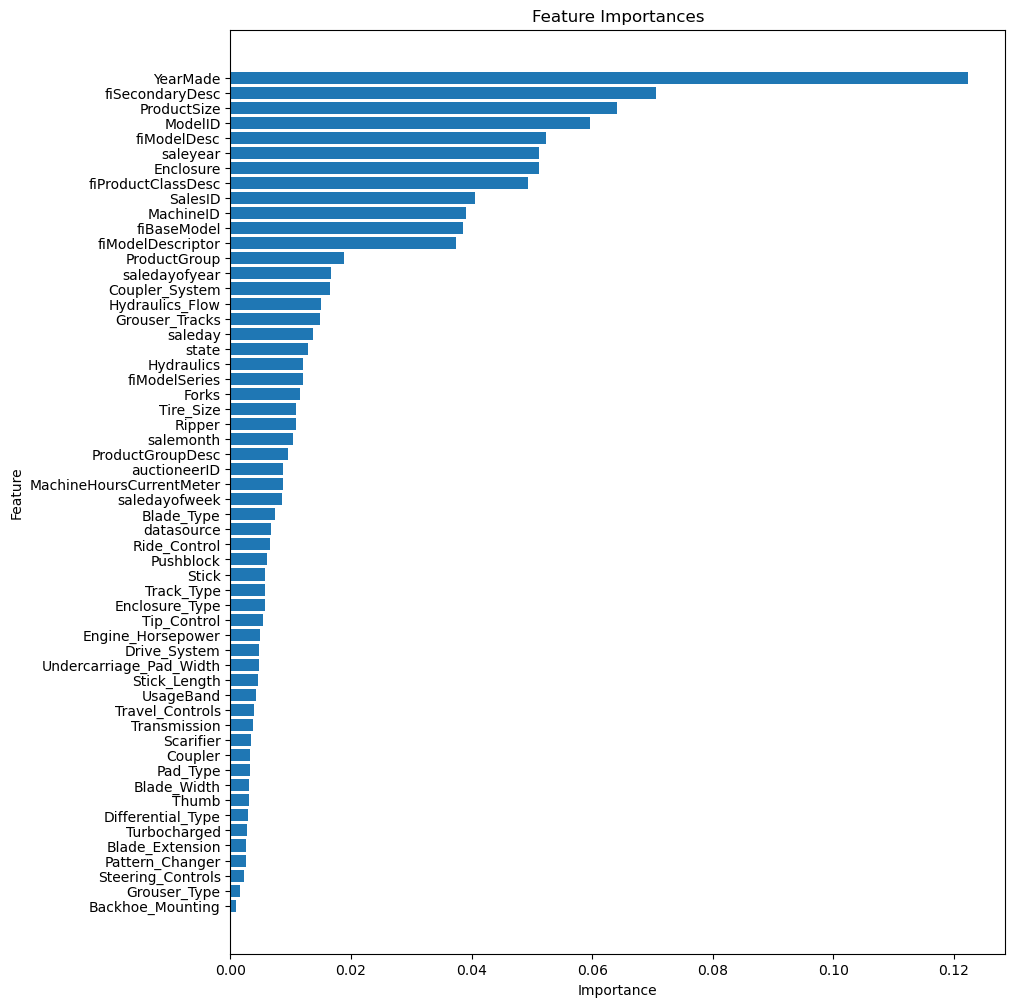

In [181]:
import matplotlib.pyplot as plt

# Assuming you have already obtained the feature importances and sorted them
# feature_importance_df = ...

# Plot feature importances
plt.figure(figsize=(10, 12))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances')
plt.gca().invert_yaxis()  # Invert y-axis to show the most important feature at the top
plt.show()

In [161]:
predictions=ideal_model.predict(testdf_c)


In [182]:
import pandas as pd

# Assuming predictions is the array of predictions
predictions_df = pd.DataFrame()
predictions_df["SalesID"] = testdf_c["SalesID"]
predictions_df["SalesPrice"] = predictions
predictions_df


,SalesID,SalesPrice
0,1227829,17467.222222
1,1227844,17217.777778
2,1227847,44988.888889
3,1227848,46216.666667
4,1227863,50616.666667
...,...,...
12452,6643171,37197.222222
12453,6643173,26197.222222
12454,6643184,18341.666667
12455,6643186,26258.333333


In [179]:
testdf["Saleprice"]=predictions_df.round(2)
testdf

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,fiModelDesc,...,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls,Saleprice
0,1227829,1006309,3168,121,3,1999,3688.0,Low,2012-05-03,580G,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17467.22
1,1227844,1022817,7271,121,3,1000,28555.0,High,2012-05-10,936,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional,17217.78
2,1227847,1031560,22805,121,3,2004,6038.0,Medium,2012-05-10,EC210BLC,...,"9' 6""",Manual,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN,44988.89
3,1227848,56204,1269,121,3,2006,8940.0,High,2012-05-10,330CL,...,None or Unspecified,Manual,Yes,Triple,NaN,NaN,NaN,NaN,NaN,46216.67
4,1227863,1053887,22312,121,3,2005,2286.0,Low,2012-05-10,650K,...,NaN,NaN,NaN,NaN,None or Unspecified,PAT,None or Unspecified,NaN,NaN,50616.67
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12452,6643171,2558317,21450,149,2,2008,NaN,NaN,2012-10-24,80NX3,...,None or Unspecified,None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN,37197.22
12453,6643173,2558332,21434,149,2,2005,NaN,NaN,2012-10-24,28N,...,None or Unspecified,None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN,26197.22
12454,6643184,2558342,21437,149,2,1000,NaN,NaN,2012-10-24,35N,...,None or Unspecified,None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN,18341.67
12455,6643186,2558343,21437,149,2,2006,NaN,NaN,2012-10-24,35N,...,None or Unspecified,None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN,26258.33
